In [1]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np

from omegaconf import OmegaConf
from einops import rearrange
from pytorch_lightning import seed_everything
from ldm.models.diffusion.ddim import DDIMSampler
%matplotlib inline
# Proposal
from utils import *

In [2]:
# load baseline pipeline (stable diffusion)
ckpt = "./models/ldm/stable-diffusion-v1/model.ckpt"
config = OmegaConf.load("./configs/stable-diffusion/v1-inference.yaml")
model = load_model_from_config(config, f"{ckpt}")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
sampler = DDIMSampler(model)

Loading model from ./models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.7.mlp.fc2.weight', 'vision_model.encoder.layers.4.mlp.fc1.weight', 'vision_model.encoder.layers.18.mlp.fc1.bias', 'vision_model.encoder.layers.11.mlp.fc2.bias', 'vision_model.encoder.layers.15.self_attn.q_proj.weight', 'vision_model.encoder.layers.12.layer_norm2.bias', 'vision_model.encoder.layers.6.mlp.fc1.bias', 'vision_model.encoder.layers.20.self_attn.q_proj.bias', 'vision_model.encoder.layers.2.self_attn.k_proj.weight', 'vision_model.encoder.layers.20.self_attn.k_proj.bias', 'vision_model.encoder.layers.20.self_attn.out_proj.weight', 'vision_model.encoder.layers.12.layer_norm2.weight', 'vision_model.encoder.layers.2.self_attn.q_proj.weight', 'vision_model.pre_layrnorm.weight', 'vision_model.encoder.layers.22.mlp.fc1.bias', 'vision_model.encoder.layers.22.mlp.fc2.bias', 'vision_model.encoder.layers.23.layer_norm1.bias', 'vision_model.enc

In [3]:
seed_everything(1) 

# initialize initializer 
agent = initializer(model, sampler)

# test prompt
prompt = [["A dog and a car"]]

# create random noise
H = W = 512
C = 4
f = 8
shape = [1, C, H // f, W // f]
img_ = torch.randn(shape).cuda()

Global seed set to 1


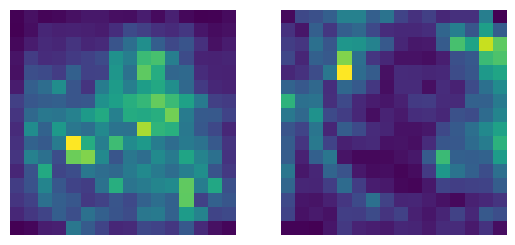

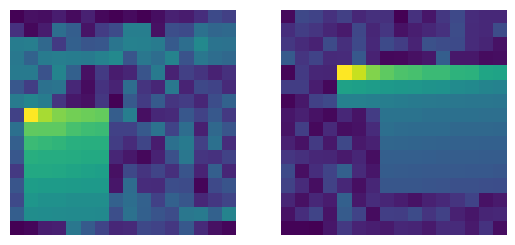

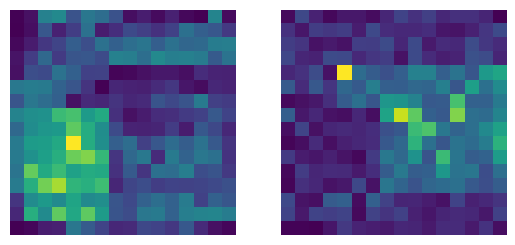

In [4]:
# Modified Attention Map (After Swapping)
img_new = agent.make_image([['A dog and a car']], [[1,7,7,15], [4,4,16,13]], [2,5], img_, True)
img_per = agent.exchange_perfect([['A dog and a car']], [[1,7,7,15], [4,4,16,13]], [2,5], img_, True)

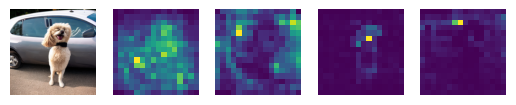

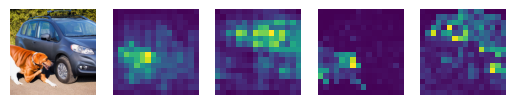

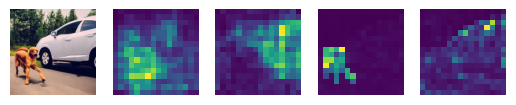

In [5]:
# generation using random Gaussian Noise (Vanilla)
# generated result, attention maps (dog, car) of the first step, attention maps (dog, car) of the last step
generate(img_, prompt, model, sampler)

# generation using modified initial noise
# generated result, attention maps (dog, car) of the first step, attention maps (dog, car) of the last step
generate(img_new, prompt, model, sampler)
generate(img_per, prompt, model, sampler)